Johanna Binta Vitale FAYE: Audit  
Almamy Youssouf LY: IA  
Coumba SY: IA  

# Exercice 3: Théoréme central limite appliqué au traitement de texte

In [1]:
import numpy as np #importation de la bibliothéque numpy pour effectuer des calculs numéiques
import matplotlib.pyplot as plt # importation du module pyplot de la bibliothéque matplotlib pour la visualisation
import pylab

#### Téléchargement et lecture du fichier

In [2]:
import string
import urllib.request
x = urllib.request.urlopen("https://r-stat-sc-donnees.github.io/LesMiserables1.txt")
livre=str(x.read(), encoding = "UTF-8")
print(livre)

﻿The Project Gutenberg EBook of Les misérables Tome I, by Victor Hugo

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Les misérables Tome I
       Fantine

Author: Victor Hugo

Release Date: January 10, 2006 [EBook #17489]
[Date last updated: July 28, 2010]

Language: French


*** START OF THIS PROJECT GUTENBERG EBOOK LES MISÉRABLES TOME I ***




Produced by www.ebooksgratuits.com and Chuck Greif




Victor Hugo

LES MISÉRABLES

Tome I--FANTINE

(1862)


TABLE DES MATIÈRES

Livre premier--Un juste

Chapitre I Monsieur Myriel
Chapitre II Monsieur Myriel devient monseigneur Bienvenu
Chapitre III À bon évêque dur évêché
Chapitre IV Les oeuvres semblables aux paroles
Chapitre V Que monseigneur Bienvenu faisait durer trop longtemps ses
     soutanes
Chapitre VI Par qui il faisait ga

In [3]:
import string
#affiche l'ensemble des éléments de la ponctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#### Suppression de la ponctuation 

In [4]:
#ponctuations = '''|!()-[]{};:'"\,<>./?@#$%^&*_~=<< >>''' #on stocke ttes les ponctuations dans la variable ponctuatons
for elt in list(string.punctuation):        #on parcoure ponctuations  
    if elt in livre:           #si une ponctuation est dans le livre
        livre = livre.replace(elt, " ")  #on la remplace par espace
print(livre) #affiche le texte sans les ponctuation

﻿The Project Gutenberg EBook of Les misérables Tome I  by Victor Hugo

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever   You may copy it  give it away or
re use it under the terms of the Project Gutenberg License included
with this eBook or online at www gutenberg org


Title  Les misérables Tome I
       Fantine

Author  Victor Hugo

Release Date  January 10  2006  EBook  17489 
 Date last updated  July 28  2010 

Language  French


    START OF THIS PROJECT GUTENBERG EBOOK LES MISÉRABLES TOME I    




Produced by www ebooksgratuits com and Chuck Greif




Victor Hugo

LES MISÉRABLES

Tome I  FANTINE

 1862 


TABLE DES MATIÈRES

Livre premier  Un juste

Chapitre I Monsieur Myriel
Chapitre II Monsieur Myriel devient monseigneur Bienvenu
Chapitre III À bon évêque dur évêché
Chapitre IV Les oeuvres semblables aux paroles
Chapitre V Que monseigneur Bienvenu faisait durer trop longtemps ses
     soutanes
Chapitre VI Par qui il faisait ga

#### Conversion des lettres en majuscules en minuscules

In [5]:
livre = livre.lower() #transforme les lettres en majuscules en minuscules
print(livre) #affiche un texte ne contenant que des lettres en miniscules

﻿the project gutenberg ebook of les misérables tome i  by victor hugo

this ebook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever   you may copy it  give it away or
re use it under the terms of the project gutenberg license included
with this ebook or online at www gutenberg org


title  les misérables tome i
       fantine

author  victor hugo

release date  january 10  2006  ebook  17489 
 date last updated  july 28  2010 

language  french


    start of this project gutenberg ebook les misérables tome i    




produced by www ebooksgratuits com and chuck greif




victor hugo

les misérables

tome i  fantine

 1862 


table des matières

livre premier  un juste

chapitre i monsieur myriel
chapitre ii monsieur myriel devient monseigneur bienvenu
chapitre iii à bon évêque dur évêché
chapitre iv les oeuvres semblables aux paroles
chapitre v que monseigneur bienvenu faisait durer trop longtemps ses
     soutanes
chapitre vi par qui il faisait ga

#### Division du texte en jetons individuels (mots)

In [6]:
liste =livre.split() #Enfin on stocke tous les mots individuellement du livre modifié dans une liste
liste_mots = [mots for mots in liste if type(mots) !='int'] #on initialise une liste dans laquelle on va stocker tous les mots du texte sans les chiffres
liste_mots #affiche une liste contenant tous les mots du texte

['\ufeffthe',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'les',
 'misérables',
 'tome',
 'i',
 'by',
 'victor',
 'hugo',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'org',
 'title',
 'les',
 'misérables',
 'tome',
 'i',
 'fantine',
 'author',
 'victor',
 'hugo',
 'release',
 'date',
 'january',
 '10',
 '2006',
 'ebook',
 '17489',
 'date',
 'last',
 'updated',
 'july',
 '28',
 '2010',
 'language',
 'french',
 'start',
 'of',
 'this',
 'project',
 'gutenberg',
 'ebook',
 'les',
 'misérables',
 'tome',
 'i',
 'produced',
 'by',
 'www',
 'ebooksgratuits',
 'com',
 'and',
 'chuck',
 'greif',
 'victor',
 'hugo',
 '

In [7]:
mots = ["un", "et", "le", "il", "est"] #on stocke les mots à compter dans une liste

values, counts = np.unique(liste_mots, return_counts = True) #nous permet de compter le nombre de fois q'un élément apparait dans la liste
#Le résultat sera retourné sous forme de deux tableaux. Un tableau nommé ici values contenant les mots
#Et un second tableau nommé counts qui compte le nombre de fois que le mot apparait dans liste_mots

for i, j in zip(values[counts.argsort()], counts[counts.argsort()]):
    
    #i parcoure le tableau des elts qui apparaissent le plus souvent
    #j parcoure le tableau contenant la fréquence d'apparition
    #la fonction zip() renvoie un itérateur de tuples basé sur les objets itérables
    #argsort() permet de faire des tris selon les indexes
    
    if i in mots: #condition
        print(f'Le mot {i} apparait {j} fois dans le livre.') #affiche  chaque avec sa fréquence d'aparution

Le mot est apparait 1129 fois dans le livre.
Le mot un apparait 1807 fois dans le livre.
Le mot le apparait 2544 fois dans le livre.
Le mot et apparait 2948 fois dans le livre.
Le mot il apparait 3185 fois dans le livre.


#### Tracr les proportions d'apparitons des mots dans le document dans un seul graphique

In [8]:
#Nombre total de mots dans le livre
nbre_mots = len(liste_mots)

#proportion
liste_freq = []
for i, j in zip(values[counts.argsort()], counts[counts.argsort()]):
    
    #i parcoure le tableau des elts qui apparaissent le plus souvent
    #j parcoure le tableau contenant la fréquence d'apparition
    #la fonction zip() renvoie un itérateur de tuples basé sur les objets itérables
    #argsort() permet de faire des tris selon les indexes
    
    if i in mots: #condition
        print(f'{i} représente {(j/nbre_mots)*100} %  des mots dans le livre.') #affiche  chaque avec sa fréquence d'aparution
        liste_freq.append((j/nbre_mots)*100)

est représente 0.9186330349877949 %  des mots dans le livre.
un représente 1.470301057770545 %  des mots dans le livre.
le représente 2.0699755899104963 %  des mots dans le livre.
et représente 2.3986981285598046 %  des mots dans le livre.
il représente 2.591537835638731 %  des mots dans le livre.


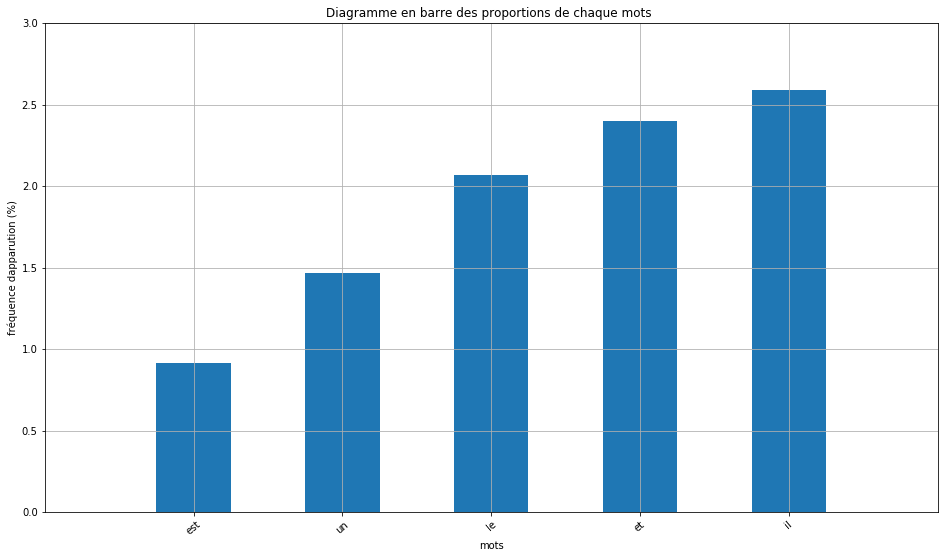

In [10]:
fig = plt.figure()

x = [1,2,3,4,5] #nombre de barres du diagramme

height = liste_freq #valeur des fréquences d'apparition en %
width = 0.5 #modifie la largeur des bâtons	
BarName = ['est', 'un', 'le', 'et', 'il'] #label de l'axe des abscisses

plt.bar(x, height, width) #mise en place du diagramme
#plt.scatter([i+width/100000 for i in x],height,color='r',s=100)

plt.xlim(0,6)  # Modifier les limites sur x
plt.ylim(0,3)  # Modifier les limites sur y
plt.grid()   #ajout de grille

plt.ylabel('fréquence d''apparution (%)') # titre axe des y
plt.xlabel('mots') #titre axe des x
plt.title('Diagramme en barre des proportions de chaque mots ') #titre

pylab.xticks(x, BarName, rotation=40)   #ajouter des labels aux bâtons
plt.rcParams["figure.figsize"] = [16,9] #paramétrage du fenêtre graphique utliser rcParams

plt.savefig("Diagramme en barre.png", bbox_inches = "tight")# bbox = "tight" permet de bien proportionner le graphique lors de l'enregistrement
plt.show()

In [13]:
#Cherchons le nombre d'apparution de chaque mot dans le livre

#values, counts = np.unique(liste_mots, return_counts = True) #nous permet de compter le nombre de fois q'un élément apparait dans la liste
#Le résultat sera retourné sous forme de deux tableaux. Un tableau nommé ici values contenant les mots
#Et un second tableau nommé counts qui compte le nombre de fois que le mot apparait dans liste_mots

#plt.plot([i for i in values], [(j/nbre_mots)*100 for j in counts ])
for i, j in zip(values[counts.argsort()], counts[counts.argsort()]):
    print(i,j)

000 1
mirage 1
miracolo 1
minutie 1
mineurs 1
minces 1
minaudière 1
milton 1
millions» 1
milliers 1
millevoye 1
millet 1
mil 1
miettes 1
miens 1
mirlitons 1
mienne 1
middle 1
microscopique 1
meuse 1
meurtrir 1
meurtrier 1
meublée 1
meublé 1
meubla 1
mettrais 1
mettons 1
mettaient 1
methods 1
method 1
mesuré 1
mien 1
mesurer 1
miroirs 1
miss 1
monastère 1
monastiques 1
monarque 1
momeries 1
molle 1
moites 1
moissonneur 1
moiré 1
moines 1
moelle 1
modération 1
modèles 1
modèle 1
modus 1
mises 1
modifiées 1
modifier 1
modified 1
modification 1
modeste 1
modes 1
modelées 1
mobiles 1
mm 1
mitré 1
mitre 1
miséricorde 1
misères 1
mississippi 1
missions 1
modifiée 1
monologues 1
messier 1
message 1
mathurin 1
maternels 1
maternel 1
matelots 1
matelot 1
massifs 1
massieu 1
mascarons 1
marée 1
maréchaux 1
martyrs 1
martyrisé 1
martyre 1
martyr 1
mathématiques 1
marteaux 1
marrons 1
marronniers 1
marqués 1
marquer 1
maroufles 1
maroquiné 1
marmottant 1
marmots 1
marmot 1
marmoréen 1
marly 1
marié

fa 1
f3 1
exécuté 1
exécutions 1
expériences 1
exécuter 1
exècrent 1
extrêmement 1
extrayons 1
extravagant 1
extraire 1
extirper 1
exterminer 1
exterminateurs 1
exterminait 1
extent 1
extasié 1
extasiait 1
extasiaient 1
exquis 1
exécuta 1
factures 1
exhiba 1
exercice 1
etait 1
estrade 1
estomacs 1
estimé 1
essuya 1
essoufflé 1
essoufflement 1
essieux 1
essentielle 1
essence 1
essayèrent 1
essayons 1
essayez 1
esquiver 1
eue 1
esquivait 1
esquimaux 1
espérances» 1
espérait 1
esplanade 1
especially 1
espacées 1
espaces 1
esdras 1
escrime 1
escoublon 1
escouade 1
esclave 1
escalader 1
escaladant 1
esquissaient 1
exerçait 1
eunuque 1
euphorion 1
exemples 1
exemplaires 1
executive 1
excusez 1
excuse 1
excommunié 1
exclusivement 1
exclusion 1
excluait 1
exclamation 1
exclamait 1
excitée 1
exciter 1
excitent 1
euphonie 1
excessif 1
examinons 1
examens 1
exagérée 1
exagérez 1
exagérant 1
exagèrent 1
exagère 1
exactitude 1
exacte 1
eussions 1
eussiez 1
eus 1
européenne 1
europe 1
exaspérée 1
fa

symétriquement 1
sympathies 1
symbole 1
sylvanie 1
syllogisme 1
syllabe 1
sylla 1
swedenborg 1
swamp 1
suspens 1
suspendus 1
suspendues 1
suspendant 1
syracuse 1
suspectes 1
sévérités 1
sûrement 1
taxes 1
taxe 1
tavannes 1
tardives 1
tarder 1
tapissés 1
tapissées 1
tapissée 1
tapes 1
tapage 1
tantale 1
tanneries 1
tanière 1
talus 1
sûre 1
takes 1
tairas 1
taillis 1
tailles 1
tailler 1
taciturne 1
tacitement 1
tacite 1
tachées 1
tabouret 1
tableaux 1
tableau 1
tabellion 1
tabatière 1
sûreté 1
tait 1
suspect 1
suscription 1
susceptibles 1
superbe 1
sum 1
sulpice 1
suivront 1
suivante 1
suit 1
suffisant 1
suffisaient 1
suffirait 1
suffiraient 1
sueurs 1
suette 1
sucrant 1
succédé 1
superposer 1
succédant 1
succède 1
succursales 1
succursale 1
successions 1
succession 1
successifs 1
substitué 1
substitution 1
substituer 1
substance 1
subscribe 1
subordonnés 1
subordonnaient 1
submergée 1
succédait 1
superposés 1
suppliant 1
suppliante 1
sus 1
survive 1
survit 1
surveillant 1
surprises 1
su

prêchait 1
prévôtale 1
prévînt 1
prévoyance 1
prévost 1
prévenons 1
prévaloir 1
prétoire 1
prétendu 1
prétendaient 1
présomption 1
présidée 1
présider 1
présidence 1
présentés 1
prêcha 1
présentée 1
puce 1
puisant 1
pénétrez 1
pénurie 1
pénombre 1
pénitentes 1
pénibles 1
pénale 1
pénal 1
pélicier 1
pékin 1
pédantisme 1
péchez 1
pécheresse 1
pèsent 1
pèche 1
puerte 1
pâlir 1
pyrrhon 1
pyramide 1
puérile 1
puéril 1
puy 1
puteaux 1
pussent 1
purent 1
punitive 1
punition 1
punis 1
punies 1
puissances 1
puisard 1
pyrénées 1
présentation 1
présentait 1
présentaient 1
provisoirement 1
provision 1
provinces 1
providentiel 1
provençal 1
provence 1
prouvée 1
protégé 1
protégeait 1
protester 1
protestations 1
protection 1
prostitués 1
prospéré 1
provocante 1
prospérer 1
prose 1
proscrits 1
proprietary 1
propreté 1
proposent 1
proposant 1
proposait 1
proposaient 1
proportions 1
proportionnés 1
proportionnez 1
prophète 1
proofread 1
prononçât 1
prosper 1
provoquer 1
prudent 1
prudents 1
préparé 1
p

arraché 1
arrachée 1
clameur 1
clapotait 1
claquèrent 1
claim 1
danton 1
baisé 1
discontinue 1
douzaines 1
chanoines 1
barrait 1
chansons 1
affectation 1
allaitait 1
chant 1
doutais 1
douta 1
apporte 1
aidèrent 1
douceurs 1
apportera 1
barleycourt 1
barcelonnette 1
chantent 1
abhorrait 1
abdique 1
abide 1
downloading 1
doyenne 1
dressent 1
dressant 1
barricadait 1
apply 1
dress 1
drapé 1
aider 1
changea 1
draperie 1
changeaient 1
changeait 1
changeants 1
draguignan 1
barreaux 1
abdiquait 1
dragonnades 1
changeât 1
chanoine 1
doublés 1
doublé 1
barberousse 1
baraqués 1
dormez 1
barabbas 1
charitables 1
dormais 1
dormaient 1
doris 1
charities 1
affairée 1
abjection 1
donors 1
charités 1
données 1
bans 1
apprenait 1
apprend 1
banquier 1
apportée 1
dormira 1
apporté 1
barbarie 1
doublant 1
doublait 1
affectait 1
dotés 1
chapelle 1
doté 1
chapelles 1
apporterait 1
barricader 1
barbe 1
chappedelaine 1
charançons 1
charcellay 1
doré 1
chargent 1
dort 1
charges 1
dors 1
affamés 1
dresserait 1


calotins 1
désolait 1
désolaient 1
désirer 1
bestial 1
désirait 1
antérieure 1
désolés 1
calmante 1
antoinette 1
bestialité 1
détention 1
détenais 1
calculated 1
dételle 1
dételez 1
détela 1
calculé 1
détachée 1
calculée 1
beure 1
détaché 1
calembours 1
caliban 1
calice 1
détachait 1
calicot 1
calmant 1
antipathies 1
blessures 1
dévore 1
cachet 1
effarées 1
animer 1
bijoux 1
animé 1
effarer 1
effarement 1
bigottini 1
allongèrent 1
effacèrent 1
effacement 1
efface 1
educational 1
edmond 1
ankylose 1
ankylosé 1
edition 1
bête» 1
animales 1
effaça 1
aggravation 1
anguleux 1
béniront 1
bénis 1
effrayait 1
angélique 1
effraya 1
bénit 1
efforçait 1
bénédicité 1
efforça 1
allouait 1
4557 1
effleure 1
bénéfices 1
bêchait 1
décharnées 1
effigie 1
aged 1
cacheta 1
anneau 1
bûche 1
dînent 1
biens 1
dînais 1
dîna 1
dîme 1
allongea 1
dévouée 1
allongeaient 1
allocution 1
dévotement 1
annotait 1
cache 1
annotant 1
bienheureux 1
dévorerait 1
annoter 1
dévoue 1
dînons 1
annonçons 1
cabraient 1
bûchero

rapporta 2
cloche 2
pinte 2
vivrez 2
pincées 2
rappelez 2
cloison 2
bigot 2
pigault 2
cabane 2
pourpre 2
pierres 2
clouée 2
admettait 2
bigote 2
refusait 2
bêtises 2
réponds 2
résolutions 2
vénus 2
physical 2
canon 2
cléopâtre 2
baissant 2
ranimait 2
references 2
volés 2
piqua 2
clin 2
potion 2
réputation 2
sensations 2
placés 2
placée 2
cachaient 2
redistributing 2
pouce 2
placer 2
administration 2
avis 2
clausel 2
baisait 2
redistribution 2
redorer 2
sentaient 2
cabriolets 2
pivot 2
candeur 2
vénérait 2
redoublement 2
républiques 2
pire 2
république 2
clermont 2
client 2
bienveillance 2
cabestan 2
rapporte 2
refaire 2
plaidoirie 2
«nous 2
adossa 2
ramené 2
pouvaient 2
personnelle 2
savant 2
béni 2
personnalité 2
relaps 2
persiste 2
savamment 2
serais 2
relevait 2
poème 2
relever 2
relevée 2
relevés 2
caporal 2
savaient 2
permitted 2
collé 2
balai 2
balance 2
adressant 2
permettait 2
perles 2
perle 2
prairies 2
réparer 2
pratiquait 2
ramasser 2
perspectives 2
philosophe 2
perspicacité

erre 2
espace 2
excellente 2
erra 2
espagnol 2
espagnole 2
ermite 2
espion 2
10 2
velours 2
12 2
espère 2
eponine 2
esquisse 2
espagne 2
amélioration 2
exceptions 2
entrouvrit 2
entendues 2
extraction 2
extrait 2
ambitieux 2
extrémités 2
allumés 2
extrêmes 2
exécution 2
entendons 2
fabrication 2
évitait 2
1714 2
entassement 2
vache 2
faculté 2
vendredi 2
enseveli 2
failli 2
faillit 2
faillite 2
éveiller 2
entendus 2
enthousiasme 2
extases 2
exquises 2
also 2
entrevue 2
entrevoit 2
exempt 2
entretenait 2
exhortation 2
entrerait 2
exiger 2
existaient 2
altesse 2
entrât 2
vanilla 2
expenses 2
expiation 2
expirer 2
explanation 2
expliquez 2
expliqué 2
allure 2
entouré 2
exprime 2
amantes 2
entrebâillée 2
folio 2
folle 2
emportait 2
antiques 2
trompé 2
éternelles 2
trompez 2
éternelle 2
generations 2
trompant 2
détacha 2
étendu 2
gentil 2
étendre 2
gentilshommes 2
genèse 2
germer 2
gestes 2
désolé 2
désoeuvrement 2
désirs 2
glacial 2
glacé 2
triomphante 2
gassendi 2
gaspard 2
déterminé 2
ét

talon 3
pensive 3
salut 3
inconvénient 3
incorruptible 3
prostitution 3
écuelle 3
chaos 3
indescriptible 3
pendre 3
make 3
aigle 3
pensant 3
proprement 3
serrait 3
indifférentes 3
écus 3
deviendra 3
persistait 3
titre 3
insu 3
pompe 3
chiens 3
jetait 3
jetaient 3
cloître 3
jeanne 3
électeur 3
clémence 3
physique 3
physionomiste 3
accablée 3
jarrets 3
physiologiste 3
dentiste 3
janvier 3
thérèse 3
théâtre 3
tenue 3
b 3
baissée 3
phase 3
adossé 3
arrivant 3
«monsieur 3
savoyards 3
baisser 3
pomme 3
classique 3
dirigeait 3
londres 3
sentiers 3
vieillards 3
tenu 3
jetée 3
«mon 3
pis 3
élevé 3
demeurait 3
jure 3
population 3
vice 3
portefeuille 3
terminée 3
portier 3
textes 3
dignes 3
porté 3
choisir 3
poser 3
sentant 3
sentence 3
demandent 3
épais 3
chimères 3
jeux 3
énergiquement 3
links 3
joies 3
chiffons 3
adorait 3
they 3
these 3
aviez 3
clou 3
terminait 3
vides 3
tablier 3
lord 3
saviez 3
voisinage 3
dispenser 3
poli 3
intègre 3
devînt 3
chefs 3
sauter 3
balbutia 3
coiffé 3
devons 3
d

ouvrière 6
fonctions 6
agissait 6
bleuets 6
enfer 6
format 6
embrun 6
tyran 6
sociale 6
rentrer 6
rentrait 6
rente 6
renoncement 6
effroyable 6
paid 6
blancheur 6
brume 6
feuilles 6
amoureux 6
ferré 6
venant 6
escalade 6
aimer 6
bords 6
essayé 6
rose 6
ruelle 6
vaste 6
ouvrage 6
examiner 6
entrez 6
entrai 6
entièrement 6
rivière 6
extrême 6
éviter 6
austère 6
amener 6
facilement 6
rébellion 6
branches 6
ferma 6
fermer 6
effrayant 6
impôt 6
froids 6
trésor 6
papiers 6
canne 6
cardinal 6
heureuses 6
volunteers 6
humanité 6
tranquillité 6
tranquillement 6
vêtu 6
appela 6
travaille 6
quelconque 6
pénétrait 6
ignorant 6
péché 6
songé 6
sonna 6
web 6
pur 6
drôle 6
puissance 6
crépuscule 6
réverbération 6
démon 6
dénonce 6
caissier 6
panier 6
bizarre 6
fusil 6
félix 6
religion 6
étiez 6
religieux 6
gagnait 6
gagne 6
trous 6
regardé 6
gargote 6
garçons 6
considération 6
gendarmerie 6
étendit 6
glace 6
anxiété 6
cabinet 6
gouffre 6
goutte 6
apercevoir 6
condamna 6
5 6
marie 6
soin 6
nombre 6
ph

foule 32
pourrait 32
sentait 32
papier 32
ailleurs 32
simplice 32
juste 32
dis 32
face 32
cents 32
works 32
quinze 32
médecin 32
nature 32
huit 32
milieu 33
ayant 33
venu 33
arrivé 33
prêtre 33
faites 33
chercher 33
font 33
voici 33
demi 34
livre 34
loin 34
longtemps 34
mademoiselle 34
état 34
alla 34
forçat 34
feu 34
myriel 34
fenêtre 34
ouvrit 34
veut 34
déjà 34
société 34
quarante 34
neuf 35
pied 35
fallait 36
enfin 36
effet 36
silence 36
filles 36
parler 36
savait 36
abord 36
arras 36
oh 36
faite 37
rire 37
pauvres 37
passé 37
debout 37
any 37
bout 38
auberge 38
voyez 38
coeur 38
travail 38
pensée 38
leurs 38
parlait 38
parce 38
regardait 38
pourtant 38
eh 38
froid 38
celui 38
leva 38
seulement 38
livres 39
chaque 39
jardin 39
bienvenu 40
doute 40
mains 40
regard 40
quelle 41
joie 41
petites 41
curé 41
paroles 41
sait 42
comment 42
fort 42
président 42
police 42
mille 42
salle 42
lumière 42
contre 42
favourite 42
cent 43
écria 43
instant 43
saint 44
pourquoi 44
cheveux 45
work 45
p

 ### Pourquoi ne pouvons nous pas appliquer le théorème centrale (TCL) directement ?
 
Le théorème énonce que les moyennes d'un grand nombre d'échantillons suivent une loi normale, même si ceux-çi suivent individuellement une autre loi de probabilité.
En effet, la proportion de mots choisis pour être représentée graphiquement est faible et l'allure de l'histogramme ne suit pas celle de la loi normale centrale réduite. Ceci entraine que l'on ne peut pas appliquer directement le théoréme centrale.

### Que devons-nous faire sur le texte pour appliquer le TCL ?

Pour pouvoir appliquer le théoréme, il faut que l'on augmente la taille de notre échantillon car plus ce dernier est grand, plus on a de chances de vérifier que l'allure du diagramme en bâton ou de l'histogramme des échantillons se rapprochent fortement de la coube gaussienne. 